In [1]:
 #from keras.preprocessing.image import ImageDataGenerator 
import tensorflow as tf 
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, Lambda, Multiply,GlobalAveragePooling2D
from keras import backend as K
import cv2, numpy as np
import glob
import random
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from keras.optimizers import SGD, Adam
from keras.activations import relu 
import keras as keras
from keras.models import Model,load_model
from keras.layers import  Input,Conv2D,BatchNormalization,Activation,Lambda,Subtract,concatenate,Add,add,Reshape

from keras.layers import Input, concatenate, Conv2D, MaxPooling2D, Conv2DTranspose,DepthwiseConv2D,Concatenate
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras import losses
from keras.layers import  Layer,Activation, Lambda, MaxPooling2D, UpSampling2D, Conv2DTranspose, SpatialDropout2D
import os
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping 
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from  sklearn.model_selection import train_test_split

#from tensorflow.python import debug as tf_debug
import imageio
from glob import glob
from skimage import transform as tf
from keras.losses import mse, binary_crossentropy


from scipy import ndimage
import matplotlib.pyplot as plt
import matplotlib.image as plt_img
import scipy
import scipy
import skimage
import re
#import LRFinder
import math as m
import tensorflow as tf 
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler 
from keras import backend as K
from pathlib import Path
from keras import objectives

from keras import optimizers

import numpy as np
 
from keras import backend as K
from skimage.measure import compare_ssim, compare_psnr

from keras.utils import to_categorical

import cv2
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

tf.random.Generator = None 
import tensorflow_addons as tfa
from keras.datasets import  mnist, fashion_mnist

import warnings
warnings.filterwarnings('ignore')
from keras.models import Model
from keras.utils import to_categorical


from datetime import datetime
from scipy.fftpack import dct, idct
import copy
from keras.applications import vgg19


from keras.applications.vgg16 import   preprocess_input, decode_predictions

Using TensorFlow backend.


In [2]:
(x_train, y_train), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
num_labels = len(np.unique(y_train))
y_train = to_categorical(y_train)
Y_test = to_categorical(Y_test)

print(y_train.shape, Y_test.shape)

(50000, 10) (10000, 10)


In [4]:
image_size = x_train.shape[1]

x_train = np.reshape(x_train,[-1, image_size, image_size, 3])
X_test = np.reshape(X_test,[-1, image_size, image_size, 3])

x_train = x_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

print(x_train.shape, X_test.shape)

 
x_val=X_test[:8000]
y_val=Y_test[:8000]
x_test=X_test[8001:]
y_test=Y_test[8001:]

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [5]:
from keras.models import Model
filters=64
kernel_size=3
dropout = 0.3

inputs = Input(shape=(32, 32, 3))
y = Conv2D(filters=filters,kernel_size=kernel_size,activation='relu', padding='same', kernel_initializer='he_normal')(inputs)
y = MaxPooling2D()(y)
y = Conv2D(filters=filters,kernel_size=kernel_size,activation='relu', padding='same', kernel_initializer='he_normal')(y)
y = MaxPooling2D()(y)
y = Conv2D(filters=filters,kernel_size=kernel_size,activation='relu', padding='same', kernel_initializer='he_normal')(y)
y = MaxPooling2D()(y)
y = Conv2D(filters=filters,kernel_size=kernel_size,activation='relu', padding='same', kernel_initializer='he_normal')(y) 

y = Flatten()(y)
 
y = Dropout(dropout)(y)
outputs = Dense(num_labels, activation='softmax')(y)

 
model = Model(inputs=inputs, outputs=outputs)

 
#model =VGG16_BN(input_tensor=None, input_shape=x_train.shape[1:], classes=10, conv_dropout=0.1, dropout=0.3, activation='relu')
 
#model.summary()

In [6]:
model.load_weights('w1.hdf5')

s=model.predict(x_test)

In [7]:
l_n=[]
for idx in range(len(model.layers)):
    l_n.append(model.get_layer(index = idx).name)
    print(idx,model.get_layer(index = idx).name)

0 input_1
1 conv2d_1
2 max_pooling2d_1
3 conv2d_2
4 max_pooling2d_2
5 conv2d_3
6 max_pooling2d_3
7 conv2d_4
8 flatten_1
9 dropout_1
10 dense_1


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


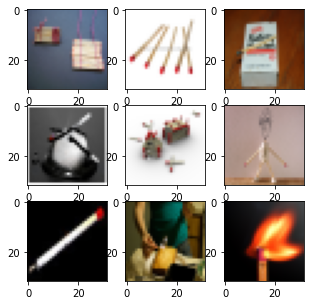

In [8]:
filenames = np.array(glob('644/*.jpeg'))  

i_m=[]
t_o=[]

dm=32
for i in range(len(filenames)):
    img =  cv2.imread(filenames[i])
    img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)/255 
    img =  np.array(img )
    imgp =   (cv2.resize(img ,(dm,dm) ,  interpolation = cv2.INTER_AREA))
    #imgp =  preprocess_input(cv2.resize(img ,(dm,dm) ,  interpolation = cv2.INTER_AREA))
    t_o.append(imgp)  
    i_m.append(img)  
    

t_o=np.asarray(t_o)
i_m=np.asarray(i_m)

fig = plt.figure(figsize=(5, 5))

for i in range(9):
    fig.add_subplot(3, 3, i+1)
    plt.imshow(t_o[i] )


In [9]:
print(np.argmax(model.predict(t_o),axis=1 ) )

[8 0 7 2 0 2 0 2 6 6 7 6 0 6 5 2 3 8 7 2 2 8 7 3 9 6 2 8 2 0 0 2 2 8 2 6 2
 1 8 6 8 0 6 8 3]


### Looks like match-sticks are more likely to be bird/horse/frog according to trained network

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


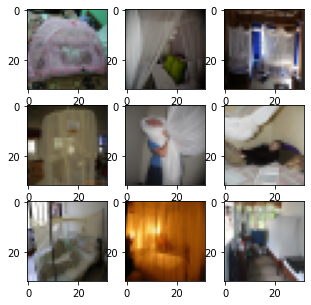

In [10]:
filenames = np.array(glob('669i/*.jpeg'))  

i_m=[]
t_o=[]

dm=32
for i in range(len(filenames)):
    img =  cv2.imread(filenames[i])
    img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)/255 
    img =  np.array(img )
    imgp =   (cv2.resize(img ,(dm,dm) ,  interpolation = cv2.INTER_AREA))
    #imgp =  preprocess_input(cv2.resize(img ,(dm,dm) ,  interpolation = cv2.INTER_AREA))
    t_o.append(imgp)  
    i_m.append(img)  
    

t_o=np.asarray(t_o)
i_m=np.asarray(i_m)

fig = plt.figure(figsize=(5, 5))

for i in range(9):
    fig.add_subplot(3, 3, i+1)
    plt.imshow(t_o[i] )

In [11]:
print(np.argmax(model.predict(t_o),axis=1 ) )

[5 2 9 3 2 3 3 3 2 8 3 3 3 4 6 3 6 4 3 2 4 3 3 3 3 5 3 2 3 3 2 2 3 5 3 7 3
 4 2 3 2]


### Looks like mosquito nets are more likely to be cats according to trained network

In [12]:
 

def cls_img(ary,ary1,cls_id):
    all_t=list()
    for i in range(len(ary)):
        i_d=np.argmax(ary1[i])
        if i_d==cls_id:
            t_im=ary[i]
            all_t.append(t_im)
    a_t=np.asarray(all_t)
    return a_t
    
c0=cls_img(x_train,y_train,0)
c1=cls_img(x_train,y_train,1)    
c2=cls_img(x_train,y_train,2)  
c3=cls_img(x_train,y_train,3)         
c4=cls_img(x_train,y_train,4)         
c5=cls_img(x_train,y_train,5)         
c6=cls_img(x_train,y_train,6) 
c7=cls_img(x_train,y_train,7) 
c8=cls_img(x_train,y_train,8) 
c9=cls_img(x_train,y_train,9) 

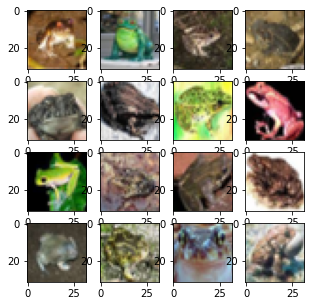

In [13]:
fig = plt.figure(figsize=(5, 5))

for i in range(16):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(c6[i] ) 

In [105]:
def nrm_rspn(ary):
    nl=list()
    
    for i in range((ary.shape[2])):
        a1=ary[:,:,i] 
        nm= np.linalg.norm(a1)
        nl.append(nm)
        
    return np.asarray(nl)

def layer_resp(img,l_id,model):
    intermediate_layer_model = Model(inputs=model.input, outputs=model.layers[l_id].output)
    intermediate_output = intermediate_layer_model.predict(img)
    return intermediate_output[0]

def layer_respb(img,l_id,model):
    intermediate_layer_model = Model(inputs=model.input, outputs=model.layers[l_id].output)
    intermediate_output = intermediate_layer_model.predict(img)
    return intermediate_output 
    

def impr(imk):
    art=[]
    art.append(imk) 
    ar = np.asarray(art)
    return ar

def get_grad(im,ld,model,cls):
    #im=impr(im)
    y_c = model.output[0, cls]
    conv_output = model.layers[ld].output
    grads = K.gradients(y_c, conv_output)[0]
    gradient_function = K.function([model.input], [ grads])
    grads_val = np.asarray(gradient_function( im ))
    return grads_val[0][0]


def get_gradb(im,ld,model,cls):
    #im=impr(im)
    y_c = model.output[0, cls]
    conv_output = model.layers[ld].output
    grads = K.gradients(y_c, conv_output)[0]
    gradient_function = K.function([model.input], [ grads])
    grads_val = np.asarray(gradient_function( im ))
    return grads_val[0] 


def chnl_norm(ary):
    nm=list()
    d=ary.shape[2]
    for i in range(d):
        n=np.linalg.norm(ary[:,:,i]) 
        nm.append(n)
    return np.asarray(nm)


def avrg_grad_norm_image_set(ary,model, layer_id, class_id):
    
    grd=get_gradb(ary,layer_id,model,class_id) 
    g_m=np.mean(grd,axis=0) 
    nrm=chnl_norm(g_m)
    return nrm

### Lets check gradient for both  real cat image and predicted as a cat image

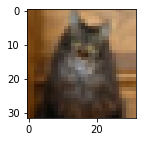

In [115]:
c_im=c3[3]
plt.figure(figsize=(2, 2))
plt.imshow(c_im)

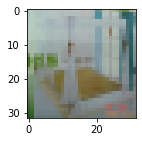

In [116]:
p_im=t_o[9]
plt.figure(figsize=(2, 2))
plt.imshow(p_im)

In [117]:
g1=get_grad(impr(c_im),2,model,4)
g2=get_grad(impr(p_im),2,model,4)

In [118]:
gn1=chnl_norm(g1)
gn2=chnl_norm(g2)
# gn1=gn1/np.max(gn1)
# gn2=gn2/np.max(gn2)

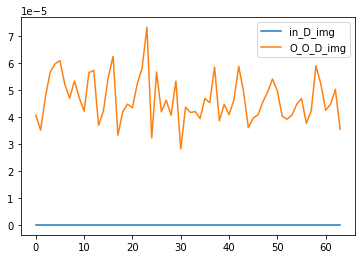

In [176]:
fig, ax = plt.subplots(figsize=(6, 4))
plt.plot(gn1)
plt.plot(gn2)  
plt.legend(['in_D_img', 'O_O_D_img'], loc='upper right')

### Lets find the averge norm of the gradient for the CIFAR10 test images w.r.t. all classes

In [184]:
avrg_grd=list()
for i in range(10):
    grc=avrg_grdnorm_test_set=avrg_grad_norm_image_set(x_test,model,4,i)
    avrg_grd.append(grc )
    
avrg_grd=np.asarray(avrg_grd)

total_avrg=np.mean(avrg_grd,axis=0) 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[5 2 9 3 2 3 3 3 2 8 3 3 3 4 6 3 6 4 3 2 4 3 3 3 3 5 3 2 3 3 2 2 3 5 3 7 3
 4 2 3 2]


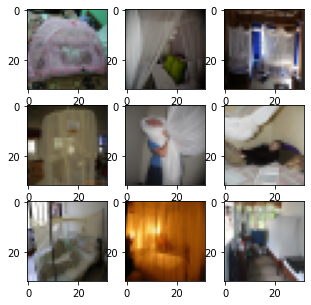

In [195]:
filenames = np.array(glob('669i/*.jpeg'))  

i_m=[]
t_o=[]

dm=32
for i in range(len(filenames)):
    img =  cv2.imread(filenames[i])
    img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)/255 
    img =  np.array(img )
    imgp =   (cv2.resize(img ,(dm,dm) ,  interpolation = cv2.INTER_AREA))
    #imgp =  preprocess_input(cv2.resize(img ,(dm,dm) ,  interpolation = cv2.INTER_AREA))
    t_o.append(imgp)  
    i_m.append(img)  
    

t_o=np.asarray(t_o)
i_m=np.asarray(i_m)

fig = plt.figure(figsize=(5, 5))

for i in range(9):
    fig.add_subplot(3, 3, i+1)
    plt.imshow(t_o[i] )
    
(print(np.argmax(model.predict(t_o),axis=1 ) )) 

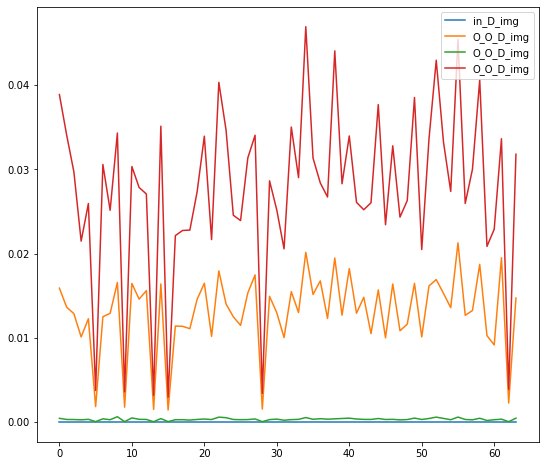

In [201]:
norm_test_set=total_avrg
norm_test_OOD1=avrg_grad_norm_image_set(t_o,model,4,1)
norm_test_OOD2=avrg_grad_norm_image_set(t_o,model,4,2)
norm_test_OOD3=avrg_grad_norm_image_set(t_o,model,4,5)


fig, ax = plt.subplots(figsize=(9, 8))
plt.plot(norm_test_set)
plt.plot(norm_test_OOD1)  
plt.plot(norm_test_OOD2) 
plt.plot(norm_test_OOD3)
plt.legend(['in_D_img', 'O_O_D_img', 'O_O_D_img', 'O_O_D_img'], loc='upper right')

[3 5 5 5 6 3 5 8 6 5 1 6 3 3 6 6 3 6 8 5 6 6 5 5 6 6 5 5 3 6 2 6 6 3 5 3 6
 6 5 6 5 8 3 5 8 5 5 6 3 4 5 3 5 6 3 6 3 4 5 6 5 3 8 3 3 6 5 0 6 6 3 5 2 5
 6 3 5 3 5 5 5 3 3 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 1 5 3 9 5 5 8 5 4 5 5 5
 9 5 0 8 8 5 3 6 5 5 3 3 6 3 0 6 6 5 3 4 3 3 3 3 5 5 3 5 5 5 3 3 3 8 5 3 5
 2 3 5 2 5 3 3 8 6 5 5 3 5 5 3 3 5 3 5 9 6 9 3 6 3 6 6 5 3 3 0 5 6 3 3 3 5
 4 3 0 6 1 5 3 5 6 3 5 3 3 3 3 3 5 3 3 4 4 3 3 3 4 3 3 5 5 6 3 3 5 6 3 8 5
 3 5 6 5 8 5 6 5 2 5 3 3 8 6 9 5 5 4]


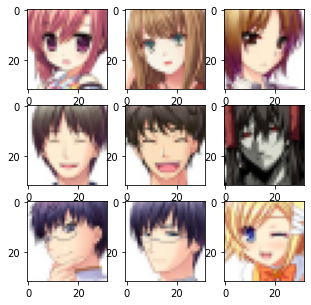

In [205]:
filenames = np.array(glob('sh/*.png'))  

i_m=[]
t_o=[]

dm=32
for i in range(len(filenames)):
    img =  cv2.imread(filenames[i])
    img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)/255 
    img =  np.array(img )
    imgp =   (cv2.resize(img ,(dm,dm) ,  interpolation = cv2.INTER_AREA))
    #imgp =  preprocess_input(cv2.resize(img ,(dm,dm) ,  interpolation = cv2.INTER_AREA))
    t_o.append(imgp)  
    i_m.append(img)  
    

t_o=np.asarray(t_o)
i_m=np.asarray(i_m)

fig = plt.figure(figsize=(5, 5))

for i in range(9):
    fig.add_subplot(3, 3, i+1)
    plt.imshow(t_o[i] )
    
    
(print(np.argmax(model.predict(t_o),axis=1 ) ))  

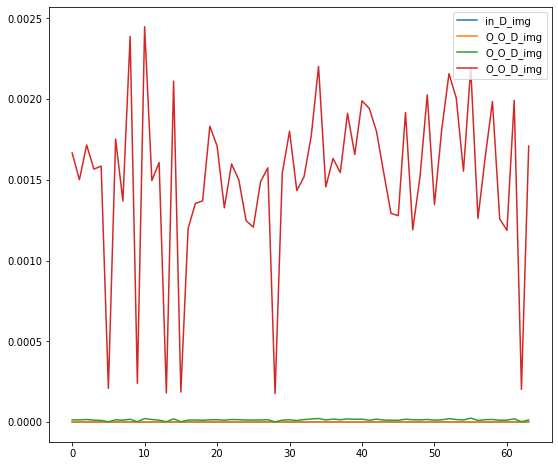

In [206]:
norm_test_set=total_avrg
norm_test_OOD1=avrg_grad_norm_image_set(t_o,model,4,1)
norm_test_OOD2=avrg_grad_norm_image_set(t_o,model,4,2)
norm_test_OOD3=avrg_grad_norm_image_set(t_o,model,4,5)


fig, ax = plt.subplots(figsize=(9, 8))
plt.plot(norm_test_set)
plt.plot(norm_test_OOD1)  
plt.plot(norm_test_OOD2) 
plt.plot(norm_test_OOD3)
plt.legend(['in_D_img', 'O_O_D_img', 'O_O_D_img', 'O_O_D_img'], loc='upper right')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[5 9 6 1 6 6 8 8 6 7 1 9 9 6 1 9 2 2 5 2 0 1 6 3 5 3 2 6 1]


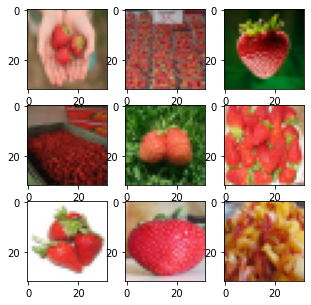

In [207]:
filenames = np.array(glob('str/*.jpeg'))  

i_m=[]
t_o=[]

dm=32
for i in range(len(filenames)):
    img =  cv2.imread(filenames[i])
    img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)/255 
    img =  np.array(img )
    imgp =   (cv2.resize(img ,(dm,dm) ,  interpolation = cv2.INTER_AREA))
    #imgp =  preprocess_input(cv2.resize(img ,(dm,dm) ,  interpolation = cv2.INTER_AREA))
    t_o.append(imgp)  
    i_m.append(img)  
    

t_o=np.asarray(t_o)
i_m=np.asarray(i_m)

fig = plt.figure(figsize=(5, 5))

for i in range(9):
    fig.add_subplot(3, 3, i+1)
    plt.imshow(t_o[i] )
    
    
(print(np.argmax(model.predict(t_o),axis=1 ) ))  

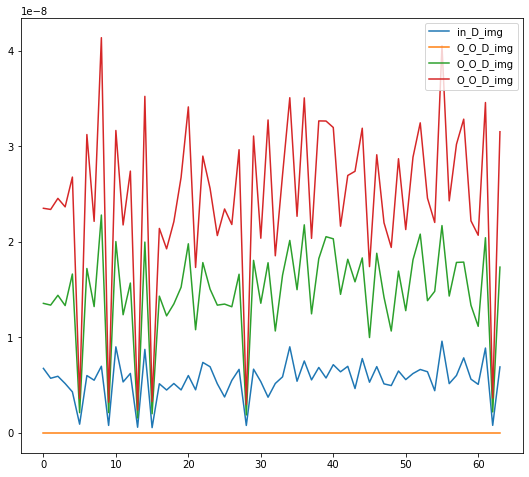

In [208]:
norm_test_set=total_avrg
norm_test_OOD1=avrg_grad_norm_image_set(t_o,model,4,1)
norm_test_OOD2=avrg_grad_norm_image_set(t_o,model,4,2)
norm_test_OOD3=avrg_grad_norm_image_set(t_o,model,4,5)


fig, ax = plt.subplots(figsize=(9, 8))
plt.plot(norm_test_set)
plt.plot(norm_test_OOD1)  
plt.plot(norm_test_OOD2) 
plt.plot(norm_test_OOD3)
plt.legend(['in_D_img', 'O_O_D_img', 'O_O_D_img', 'O_O_D_img'], loc='upper right')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[9 9 9 9 9 9 9 9 9 9 9 9 0 9 9 9 9 9 9 9]


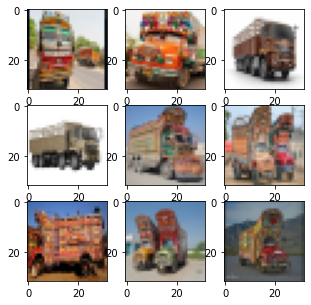

In [209]:
filenames = np.array(glob('tr/*.jpg'))  

i_m=[]
t_o=[]

dm=32
for i in range(len(filenames)):
    img =  cv2.imread(filenames[i])
    img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)/255 
    img =  np.array(img )
    imgp =   (cv2.resize(img ,(dm,dm) ,  interpolation = cv2.INTER_AREA))
    #imgp =  preprocess_input(cv2.resize(img ,(dm,dm) ,  interpolation = cv2.INTER_AREA))
    t_o.append(imgp)  
    i_m.append(img)  
    

t_o=np.asarray(t_o)
i_m=np.asarray(i_m)

fig = plt.figure(figsize=(5, 5))

for i in range(9):
    fig.add_subplot(3, 3, i+1)
    plt.imshow(t_o[i] )
    
    
(print(np.argmax(model.predict(t_o),axis=1 ) ))   

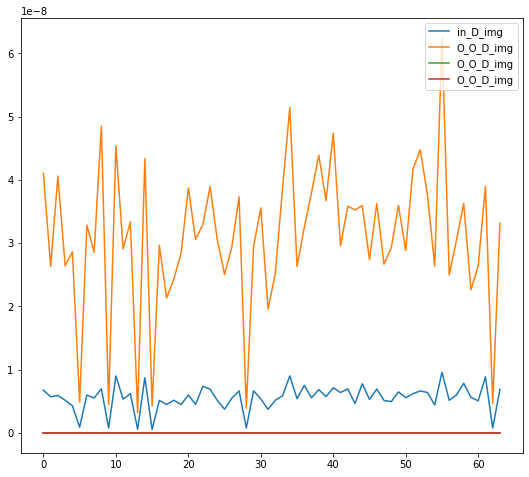

In [210]:
norm_test_set=total_avrg
norm_test_OOD1=avrg_grad_norm_image_set(t_o,model,4,1)
norm_test_OOD2=avrg_grad_norm_image_set(t_o,model,4,2)
norm_test_OOD3=avrg_grad_norm_image_set(t_o,model,4,5)


fig, ax = plt.subplots(figsize=(9, 8))
plt.plot(norm_test_set)
plt.plot(norm_test_OOD1)  
plt.plot(norm_test_OOD2) 
plt.plot(norm_test_OOD3)
plt.legend(['in_D_img', 'O_O_D_img', 'O_O_D_img', 'O_O_D_img'], loc='upper right')

[9 9 9 9 9 9 9 9 9 9 9 9 0 9 9 9 9 9 9 9]
